**CLUSTERING TECHNIQUES FOR CUSTOMER DATASET**

In [1]:
#Used for Data Processing and Analysis
import pandas as pd
##Used for Mathematical Computations
import numpy as np
#Used for data visualizations(plots & graphs)
import matplotlib.pyplot as plt

In [2]:
# Load the dataset using Pandas
mall_customer=pd.read_csv(r"C:\Python310\practice23\machine learning1\New folder\Mall_Customers.csv")
mall_customer.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Getting information abot our datasets
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#checking null values in the datasets
mall_customer.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#checking no.of.rows and columns in our datasets
mall_customer.shape

(200, 5)

In [6]:
#checking columns in the dataframe
mall_customer.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
#dropping the columns which is not relevant for the problem
x=mall_customer.drop(['CustomerID','Genre'],axis=1)


In [8]:
#statistical description for each numeric columns in the dataframe
x.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

In [10]:
# Select relevant features for clustering (e.g., 'Annual Income' and 'Spending Score')
X = x[['Annual Income (k$)', 'Spending Score (1-100)']]


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
#Agglomerative clustering is a technique used to group similar data points 
from sklearn.cluster import AgglomerativeClustering
#Dendrogram is a visual representation of the hierarchy of clusters
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')


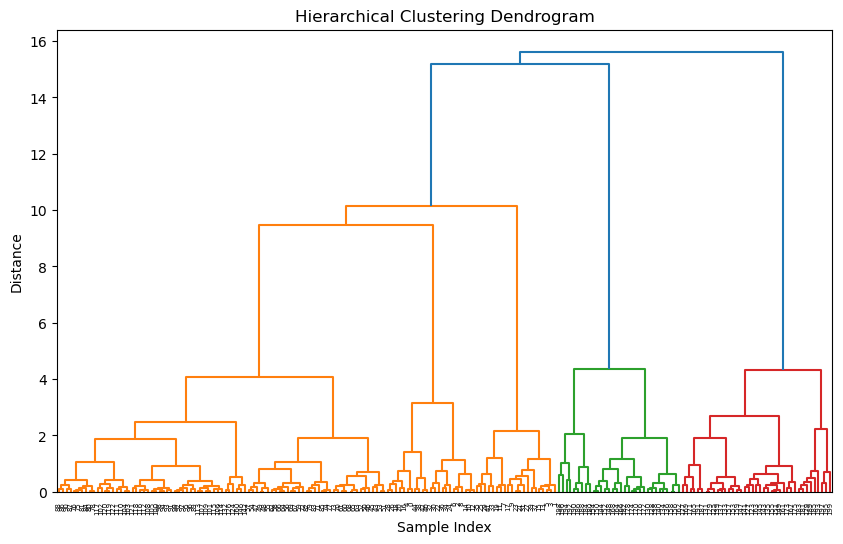

In [14]:
# Create a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [15]:
# Fit AgglomerativeClustering model
num_clusters = 5  # Adjust the number of clusters as needed
cluster_model = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
clusters = cluster_model.fit_predict(X_scaled)


In [18]:
# Add cluster labels to the dataset
X['Cluster'] = clusters

In [19]:
# Print cluster sizes
cluster_sizes = X['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)


Cluster sizes:
0    32
1    39
2    85
3    21
4    23
Name: Cluster, dtype: int64


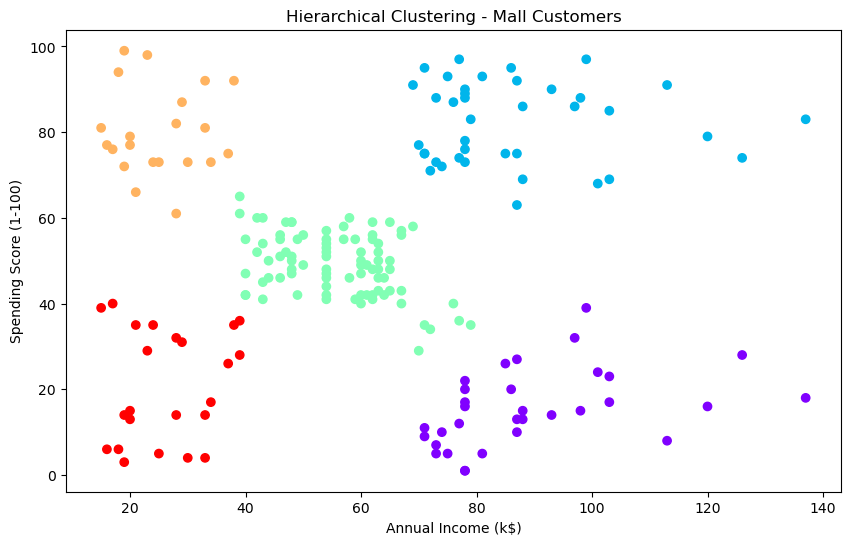

In [20]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='rainbow')
plt.title('Hierarchical Clustering - Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
